<a href="https://colab.research.google.com/github/antoniocfetngnu/InteligArtificial1/blob/main/2doParcial/2doParcial_Aprendizaje_No_Supervizado_Calderon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# 1er Dataset
##209:Top games on twitch 2016-2023
Este dataset es una colección de datos que nos muestra segun un ranking los juegos mas vistos en Twitch

###Aplicacion para aprendizaje no supervisado
Se eliminará las etiquetas que supongan categorización (RANK, GAME) para aplicar un aprendizaje no supervisado correcto.


##Importación de Dataset
https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch?resource=download


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [35]:
#  Prueba con la codificación latin1
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/2doParcial/Twitch_game_data.csv', encoding='latin1')
    print("Archivo leído con éxito usando la codificación latin1.")
except UnicodeDecodeError:
    print("Error de codificación con latin1.")

Archivo leído con éxito usando la codificación latin1.


In [11]:
print(df.describe())

               Rank         Month          Year  Hours_watched  \
count  18600.000000  18600.000000  18600.000000   1.860000e+04   
mean     100.500000      6.354839   2019.387097   5.570829e+06   
std       57.735857      3.406743      2.238686   1.885594e+07   
min        1.000000      1.000000   2016.000000   8.981100e+04   
25%       50.750000      3.000000   2017.000000   4.705542e+05   
50%      100.500000      6.000000   2019.000000   9.982500e+05   
75%      150.250000      9.000000   2021.000000   2.804888e+06   
max      200.000000     12.000000   2023.000000   3.445520e+08   

       Hours_streamed  Peak_viewers  Peak_channels     Streamers  \
count    1.860000e+04  1.860000e+04   18600.000000  1.860000e+04   
mean     1.797605e+05  6.228739e+04     658.638387  2.184601e+04   
std      5.578888e+05  1.496745e+05    2632.524422  6.507139e+04   
min      1.900000e+01  4.410000e+02       1.000000  0.000000e+00   
25%      1.480725e+04  9.548750e+03      61.000000  1.796750e+03 

In [12]:
df.dropna(inplace=True)

In [13]:
print(df.head())

   Rank                              Game  Month  Year  Hours_watched  \
0     1                 League of Legends      1  2016       94377226   
1     2  Counter-Strike: Global Offensive      1  2016       47832863   
2     3                            Dota 2      1  2016       45185893   
3     4                       Hearthstone      1  2016       39936159   
4     5       Call of Duty: Black Ops III      1  2016       16153057   

   Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers  \
0         1362044        530270           2903     129172       127021   
1          830105        372654           2197     120849        64378   
2          433397        315083           1100      44074        60815   
3          235903        131357            517      36170        53749   
4         1151578         71639           3620     214054        21740   

   Avg_channels  Avg_viewer_ratio  
0          1833             69.29  
1          1117             57.62  
2       

##Eliminacion de la columna de etiquetas
Como se aplicará aprendizaje no supervisado no debemos depnder de las etiquetas en ningun momento


In [14]:
df = df.drop('Rank', axis=1)
df = df.drop('Game', axis=1)

In [15]:
print(df.head())

   Month  Year  Hours_watched  Hours_streamed  Peak_viewers  Peak_channels  \
0      1  2016       94377226         1362044        530270           2903   
1      1  2016       47832863          830105        372654           2197   
2      1  2016       45185893          433397        315083           1100   
3      1  2016       39936159          235903        131357            517   
4      1  2016       16153057         1151578         71639           3620   

   Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  
0     129172       127021          1833             69.29  
1     120849        64378          1117             57.62  
2      44074        60815           583            104.26  
3      36170        53749           317            169.29  
4     214054        21740          1549             14.03  


In [16]:
X1 = df.values

In [43]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [19]:
X1_norm, mu, sigma = featureNormalize(X1)

###Metodo del codo

Primero probaremos a identificar un codo (una caida bruzca) para definir así la cantidad optima de Ks. Se probará con una gran cantidad de grupos para segurarnos que se tenga el codo correcto

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

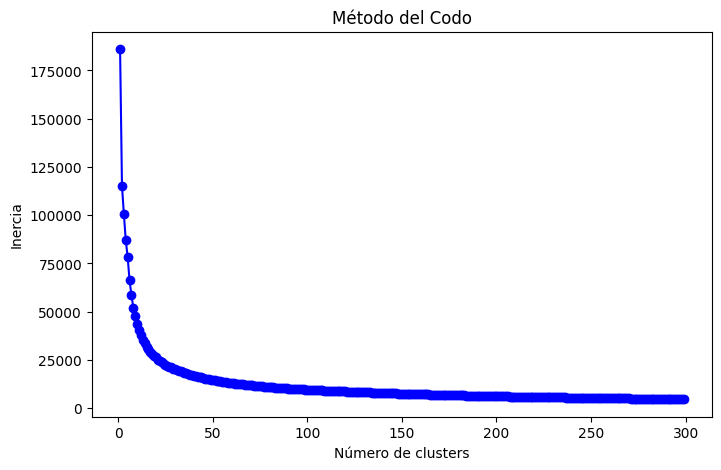

In [23]:
# Método del codo
inertias = []
K = range(1, 300)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X1_norm)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

###No se pudo identificar codo en la primera grafica
Ya que se ve que la primera grafica es como una caida en picada, entonces se decidió aplicar nuevamente en un rango más pequeño desde donde empieza la caida (1 a 20) par ver si se puede encontrar un codo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

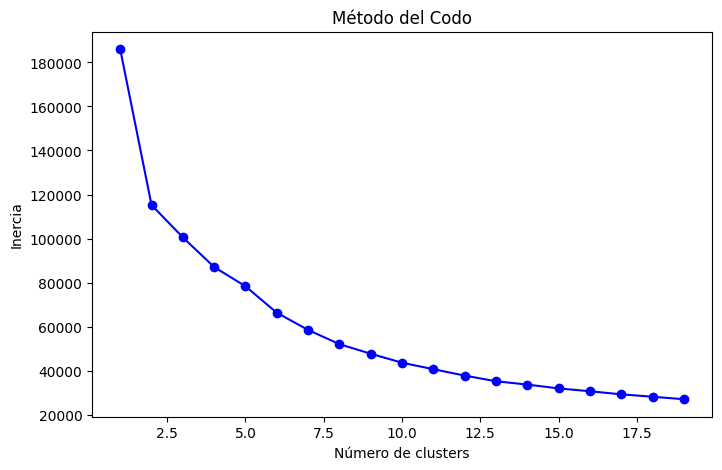

In [24]:
# Método del codo
inertias = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X1_norm)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

##Metodo del codo descartado
Como se puede observar, sí hay una caida bruzca pero no hay nunca una subida, ademas, la caida bruzca es solo para 0 a 1 grupo, por tanto no nos sirve para este caso y lo descartamos

###Nueva prueba dibujando coeficientes de silueta y el valor promedio

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

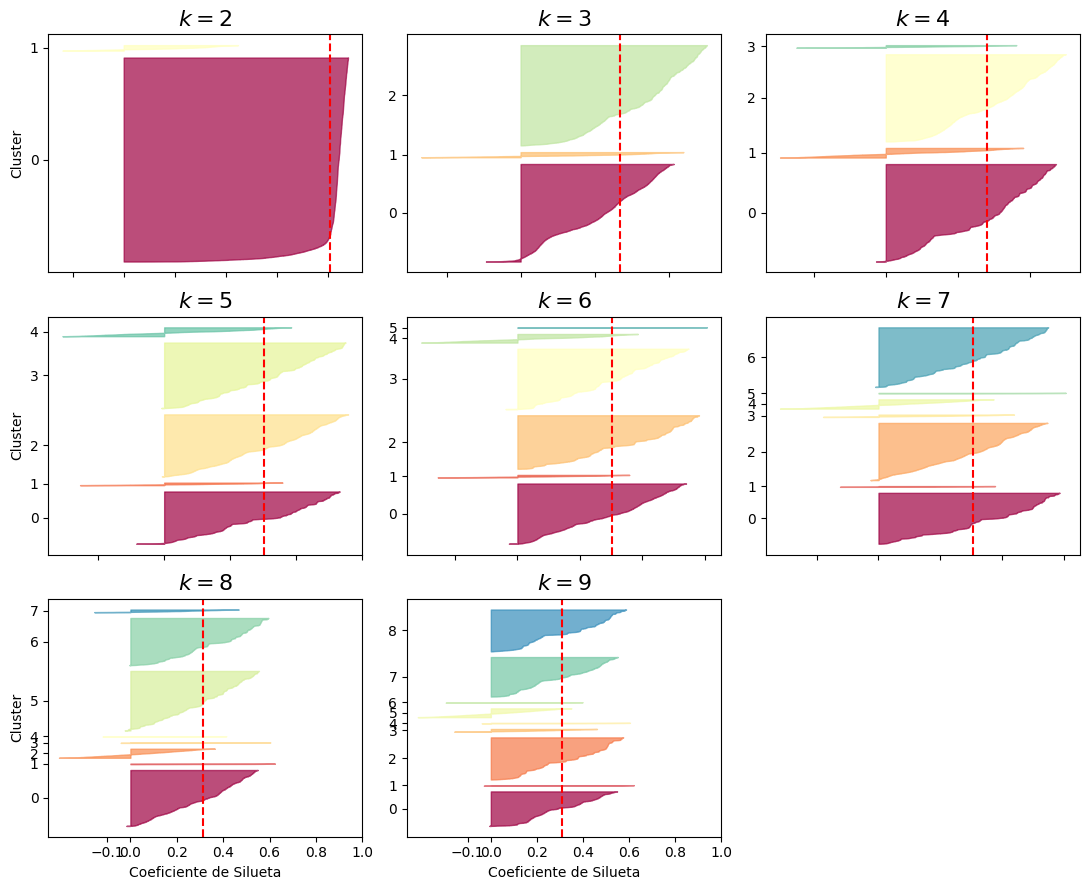

k=2, Silhouette Score=0.8104
k=3, Silhouette Score=0.2695
k=4, Silhouette Score=0.2810
k=5, Silhouette Score=0.3012
k=6, Silhouette Score=0.3033
k=7, Silhouette Score=0.3070
k=8, Silhouette Score=0.3113
k=9, Silhouette Score=0.3106
k=10, Silhouette Score=0.3128


In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib as mpl

# Calcular el modelo de KMeans para diferentes valores de k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X1_norm) for k in range(2, 11)]

# Calcular los coeficientes de silueta para cada modelo
silhouette_scores = [silhouette_score(X1_norm, model.labels_) for model in kmeans_per_k]

# Graficar los coeficientes de silueta
plt.figure(figsize=(11, 9))

for k in range(2, 10):
    plt.subplot(3, 3, k - 1)
    kmeans = kmeans_per_k[k - 2]
    y_pred = kmeans.labels_
    silhouette_coefficients = silhouette_samples(X1_norm, y_pred)

    padding = len(X1_norm) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 5, 8):
        plt.ylabel("Cluster")

    if k in (8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de Silueta")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.show()

# Imprimir los coeficientes de silueta
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"k={k}, Silhouette Score={score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

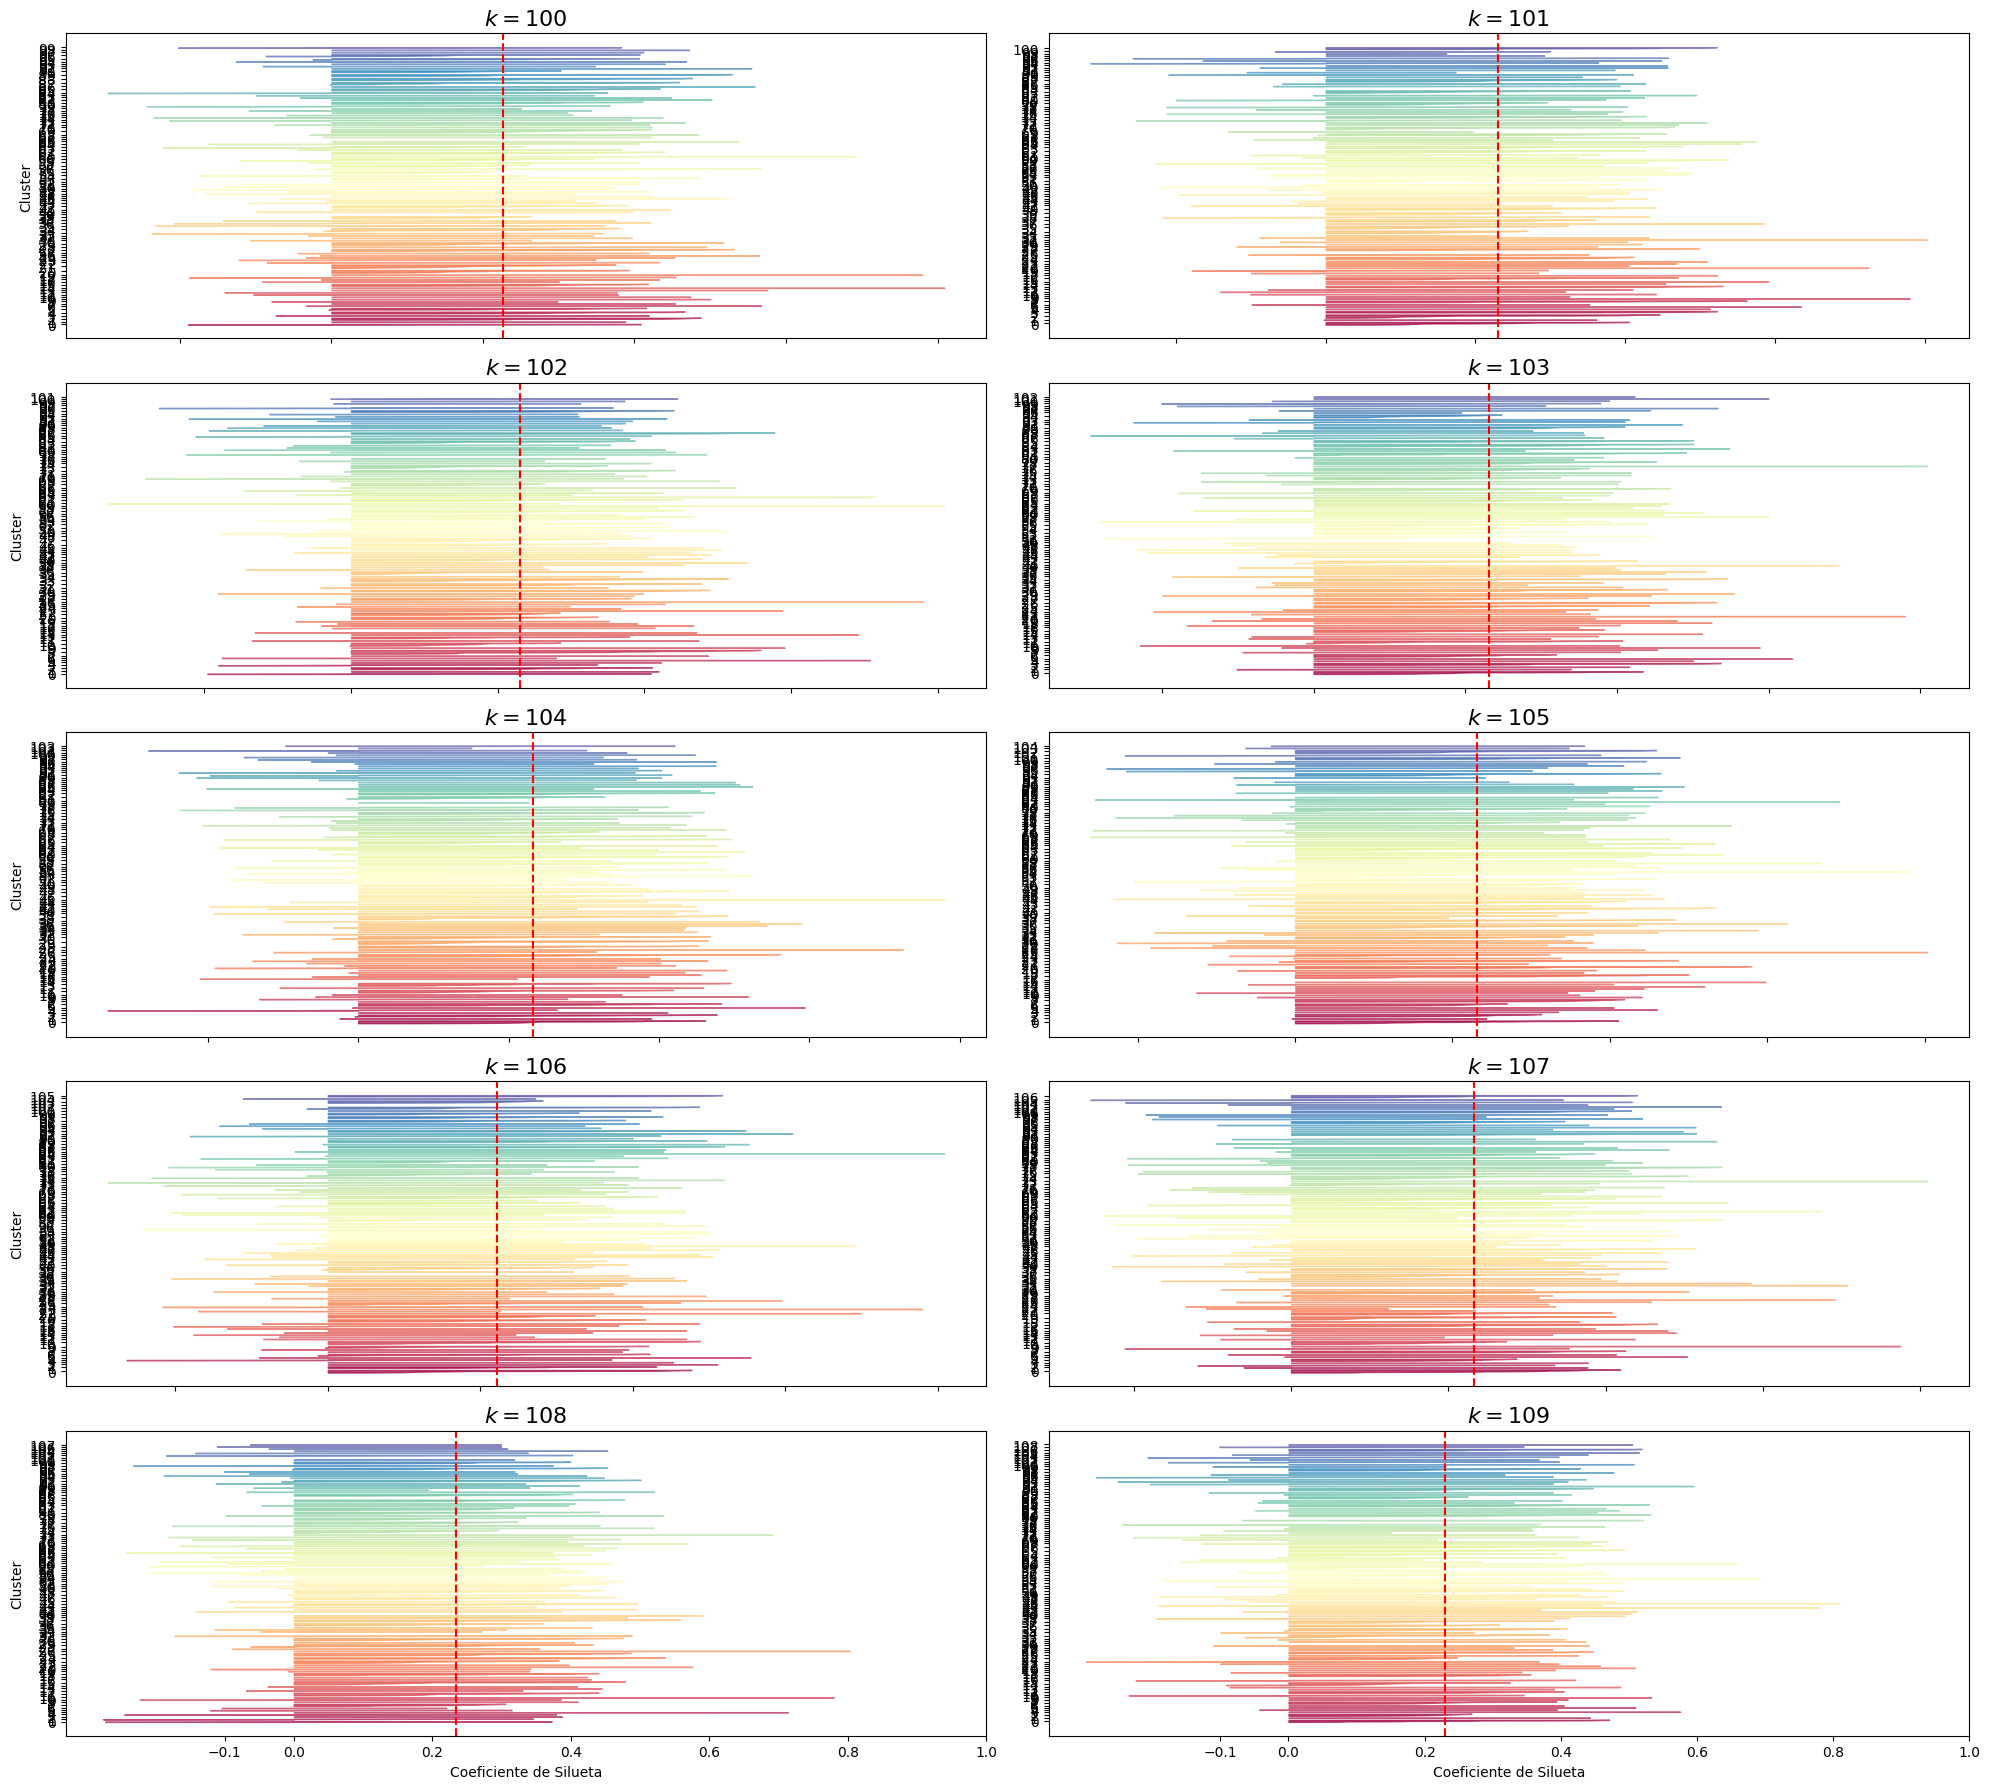

k=100, Silhouette Score=0.2270
k=101, Silhouette Score=0.2305
k=102, Silhouette Score=0.2299
k=103, Silhouette Score=0.2307
k=104, Silhouette Score=0.2323
k=105, Silhouette Score=0.2314
k=106, Silhouette Score=0.2222
k=107, Silhouette Score=0.2328
k=108, Silhouette Score=0.2345
k=109, Silhouette Score=0.2304
k=110, Silhouette Score=0.2250


In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib as mpl

# Calcular el modelo de KMeans para diferentes valores de k en el rango de 100 a 110
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X1_norm) for k in range(100, 111)]

# Calcular los coeficientes de silueta para cada modelo
silhouette_scores = [silhouette_score(X1_norm, model.labels_) for model in kmeans_per_k]

# Graficar los coeficientes de silueta
plt.figure(figsize=(20, 18))

for k in range(100, 110):
    plt.subplot(5, 2, k - 99)
    kmeans = kmeans_per_k[k - 100]
    y_pred = kmeans.labels_
    silhouette_coefficients = silhouette_samples(X1_norm, y_pred)

    padding = len(X1_norm) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (100, 102, 104, 106, 108):
        plt.ylabel("Cluster")

    if k in (108, 109):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de Silueta")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 100], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.show()

# Imprimir los coeficientes de silueta
for k, score in zip(range(100, 111), silhouette_scores):
    print(f"k={k}, Silhouette Score={score:.4f}")

Como se puede observar, los grupos no son muy regulares, sin embargo tenemos que elegir el que tenga un valor de silueta promedio más elevado pero que todos los grupos superen ese valor y además que esté lo más balanceado posible, en este caso se escogió k=5 que es el más balanceado (3 grupos grandes casi de la misma proporcion y 2 grupos pequeños con una parecida proporcion), se probó con valores elevados de k y se podria pensar que los grupos están más balanceados, sin embargo, el coeficiente de silueta es mucho menor, por eso se eligió k=5

##Usando PCA para graficar
Se puede representar en 2 dimensiones gracias a PCA los grupos escogidos con kmeans, esto nos sirve para ver como realmente estan distribuidos lso grupos y si nos parece conveniente.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


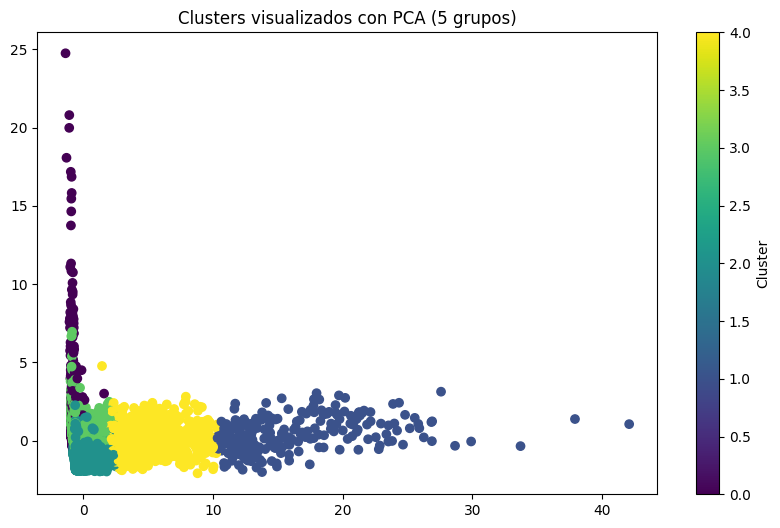

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1_norm)
# Se decidio k=5 basándome en el coeficiente de silueta
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42).fit(X1_norm)

# Visualización con 5 grupos y colores distintos para cada grupo
plt.figure(figsize=(10, 6))
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters visualizados con PCA (5 grupos)')
plt.colorbar(label='Cluster')
plt.show()

Se puede apreciar una buena distribucion de grupos, de la misma forma se ve que hay 2 grupos que son mas pequeñós que el resto, por tanto cumple con lo esperado según la siluette score.

In [31]:
# Agregar las etiquetas de cluster al dataframe original en una copia
df1_copy = df.copy()
df1_copy['Cluster'] = kmeans.labels_

# Imprimir una muestra para verificar que se hayan añadido las etiquetas
print(df1_copy.sample(10))  # Imprime una muestra de 10 filas

       Month  Year  Hours_watched  Hours_streamed  Peak_viewers  \
17701      5  2023        1590234           48799         21978   
14870      3  2022        2591272           75761         11189   
4317      10  2017         327582           19216         16162   
11875     12  2020        2364714          128707         74738   
541        3  2016         162562           18197          1950   
8077       5  2019        1062351           30624         15112   
17023      2  2023       12305861          166658         48382   
3395       5  2017         134829           14422          3242   
17502      4  2023        1644739           66700         12883   
11814     12  2020       35472272         2536048        149460   

       Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  \
17701            161       1142         2140            65             32.59   
14870            159       3600         3487           101             34.20   
4317             166  

Finalmente se agrega los grupos obtenidos al dataset en una copia para tenerlo ya etiquetado.

# 2do Dataset
##54: Covertype classificatio
Este dataset es una clasificación de tipo de cobertura en un bosque según distintas características.

###Aplicacion para aprendizaje no supervisado
Se eliminará las etiquetas que supongan categorización (Cover_Type) para aplicar un aprendizaje no supervisado correcto.


##Importación de Dataset
https://archive.ics.uci.edu/dataset/31/covertype



In [62]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/2doParcial/covtype.csv')


In [36]:
print(df2.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [63]:
df2.dropna(inplace=True)

In [64]:
df2 = df2.drop('Cover_Type', axis=1)
print(df2.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [39]:
print(df2.describe())

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

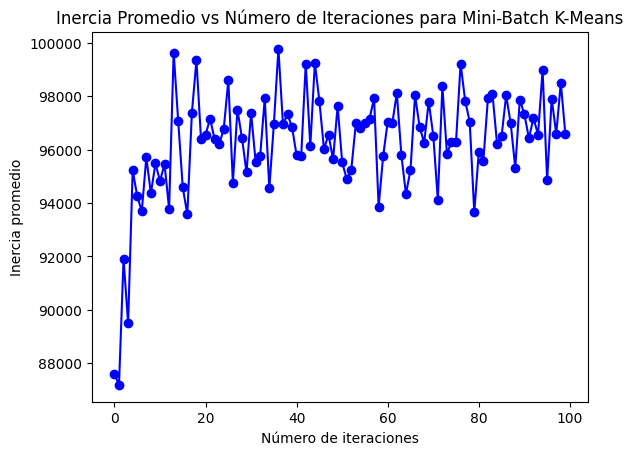

In [56]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar el dataset df2
df2_norm, mu, sigma = featureNormalize(df2)

k = 20
n_init = 10
n_iterations = 100
batch_size = 54  # Asegúrate de que coincide con la cantidad de filas en df2_norm
init_size = 54  # Asegúrate de que coincide con la cantidad de filas en df2_norm
evaluate_on_last_n_iters = 10

def load_next_batch(batch_size):
    # Generar datos aleatorios con la misma cantidad de columnas que df2_norm
    return np.random.rand(batch_size, df2_norm.shape[1])

inertias = np.zeros((n_init, n_iterations))

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    X_init_norm = np.apply_along_axis(lambda x: (x - mu) / sigma, 1, X_init)  # Aplicar la misma normalización que a df2_norm
    minibatch_kmeans.partial_fit(X_init_norm)

    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        X_batch_norm = np.apply_along_axis(lambda x: (x - mu) / sigma, 1, X_batch)  # Aplicar la misma normalización que a df2_norm
        minibatch_kmeans.partial_fit(X_batch_norm)
        inertias[init, iteration] = minibatch_kmeans.inertia_

# Calcular la inercia promedio de todas las inicializaciones en cada iteración
mean_inertias = np.mean(inertias, axis=0)

# Graficar la inercia en función del número de iteraciones
plt.plot(range(n_iterations), mean_inertias, 'bo-')
plt.xlabel('Número de iteraciones')
plt.ylabel('Inercia promedio')
plt.title('Inercia Promedio vs Número de Iteraciones para Mini-Batch K-Means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

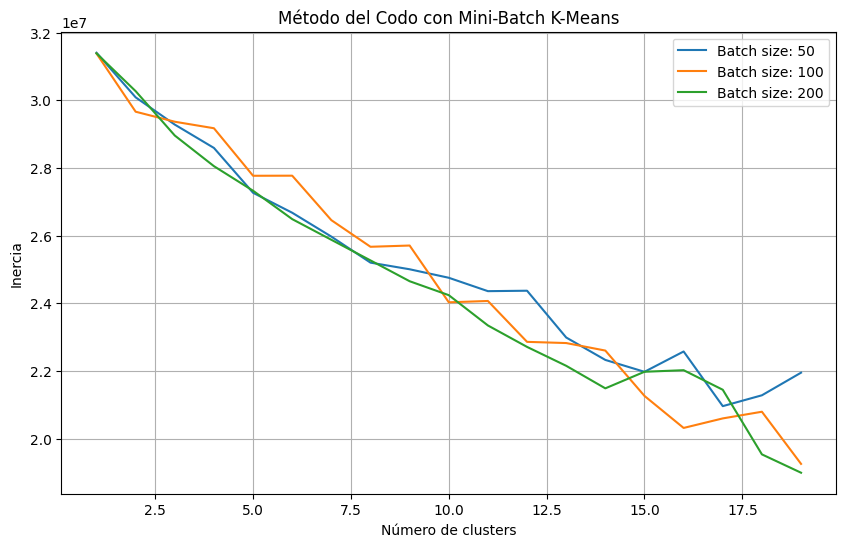

In [57]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar el dataset df2
df2_norm, mu, sigma = featureNormalize(df2)

n_clusters_range = range(1, 20)
batch_sizes = [50, 100, 200]  # Puedes ajustar los tamaños de los mini-lotes aquí

inertias = []
for batch_size in batch_sizes:
    batch_inertias = []
    for k in n_clusters_range:
        minibatch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=42)
        minibatch_kmeans.fit(df2_norm)
        batch_inertias.append(minibatch_kmeans.inertia_)
    inertias.append(batch_inertias)

# Graficar la inercia en función del número de clusters para diferentes tamaños de mini-lotes
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(n_clusters_range, inertias[i], label=f'Batch size: {batch_size}')

plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo con Mini-Batch K-Means')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# Entrenar MiniBatchKMeans con K=16
k = 16
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans.fit(df2_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=16, random_state=42)

In [66]:
# Obtener las etiquetas/clústeres asignados a todo el conjunto de datos
labels = minibatch_kmeans.predict(df2_norm)


In [67]:
# Crear una copia del dataframe original df2
df2_copy = df2.copy()

# Agregar las etiquetas/clústeres al dataframe copia
df2_copy['Cluster'] = labels


In [68]:
print(df2_copy.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

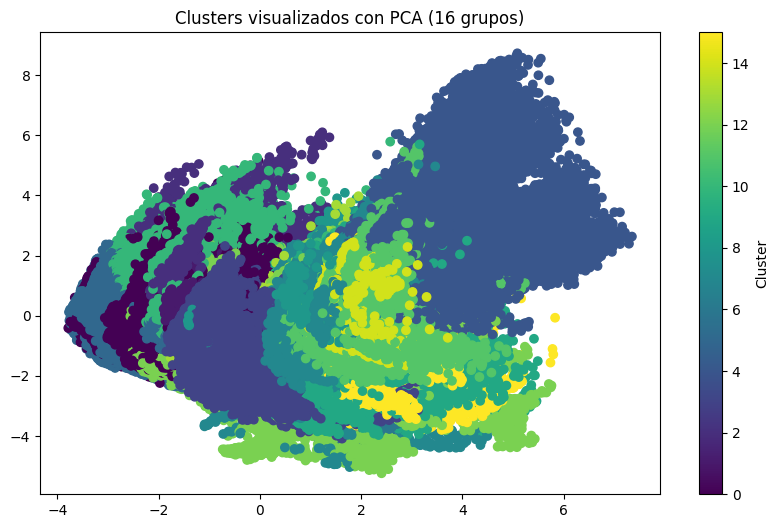

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2_norm)

# Visualización con 16 grupos y colores distintos para cada grupo
plt.figure(figsize=(10, 6))
plt.scatter(df2_pca[:, 0], df2_pca[:, 1], c=df2_copy['Cluster'], cmap='viridis')
plt.title('Clusters visualizados con PCA (16 grupos)')
plt.colorbar(label='Cluster')
plt.show()